<a href="https://colab.research.google.com/github/Benylaode/CNN_PART1/blob/main/Percobaan%2C_Alexnet%2C_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install tensorflow
!pip install keras

In [ ]:
from tensorflow.keras import models, layers
from datasets import load_dataset
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
ds = load_dataset("frgfm/imagewoof", "320px")

num_train_rows = len(ds['train'])
num_val_rows = len(ds['validation'])

print(f'Number of training rows: {num_train_rows}')
print(f'Number of validation rows: {num_val_rows}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Number of training rows: 9025
Number of validation rows: 3929


In [ ]:
class BaseModel:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build_model(self):
        raise NotImplementedError("Subclasses should implement this method")

    def compile_model(self, model):
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

    def fit_model(self, model, train_data, train_labels, epochs=10, batch_size=32):
        model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size)

class AlexNet(BaseModel):

    def build_model(self):
        model = models.Sequential()

        # 1st Conv Layer
        model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu',
                                input_shape=self.input_shape))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((3, 3), strides=2))

        # 2nd Conv Layer
        model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D((3, 3), strides=2))

        # 3rd Conv Layer
        model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

        # 4th Conv Layer
        model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

        # 5th Conv Layer
        model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
        model.add(layers.MaxPooling2D((3, 3), strides=2))

        # Flattening
        model.add(layers.Flatten())

        # Fully Connected Layers
        model.add(layers.Dense(4096, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4096, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(self.num_classes, activation='softmax'))

        return model

class VGG16(BaseModel):

    def build_model(self):
        model = models.Sequential()

        # Block 1
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                                input_shape=self.input_shape))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 2
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 3
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 4
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Block 5
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
        model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

        # Flattening
        model.add(layers.Flatten())

        # Fully Connected Layers
        model.add(layers.Dense(4096, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4096, activation='relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(self.num_classes, activation='softmax'))

        return model

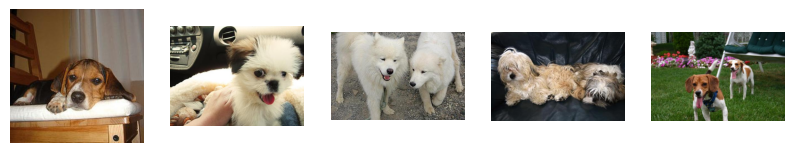

Total jumlah kelas: 10
Nama kelas: ['Australian terrier', 'Border terrier', 'Samoyed', 'Beagle', 'Shih-Tzu', 'English foxhound', 'Rhodesian ridgeback', 'Dingo', 'Golden retriever', 'Old English sheepdog']
Distribusi gambar per kelas: ClassLabel(names=['Australian terrier', 'Border terrier', 'Samoyed', 'Beagle', 'Shih-Tzu', 'English foxhound', 'Rhodesian ridgeback', 'Dingo', 'Golden retriever', 'Old English sheepdog'], id=None)
Ukuran gambar (Tinggi, Lebar, Channel): (351, 320, 3)


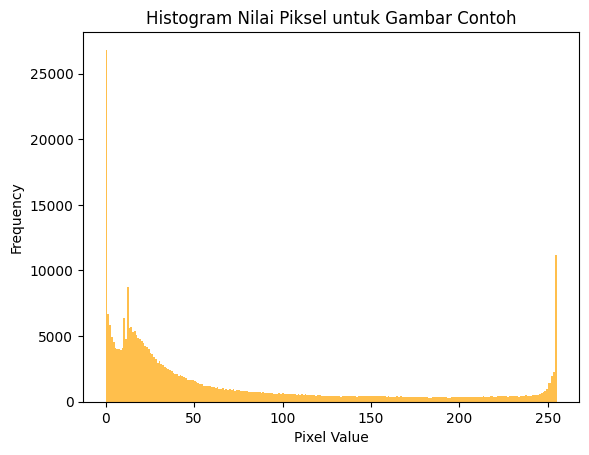

Mean nilai piksel: 67.55550510446344
Standar deviasi nilai piksel: 78.61210820333552


In [ ]:
def display_sample_images(dataset, n_samples=5):
    plt.figure(figsize=(10, 10))
    for i, sample in enumerate(dataset["train"].shuffle(seed=42).select(range(n_samples))):
        img = np.array(sample['image'])
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.show()

display_sample_images(ds)


classes = ds['train'].features['label'].names
num_classes = len(classes)
print(f"Total jumlah kelas: {num_classes}")
print(f"Nama kelas: {classes}")

label_distribution = ds['train'].features['label']
print(f"Distribusi gambar per kelas: {label_distribution}")

sample_img = np.array(ds['train'][0]['image'])
print(f"Ukuran gambar (Tinggi, Lebar, Channel): {sample_img.shape}")

plt.hist(sample_img.ravel(), bins=256, color='orange', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram Nilai Piksel untuk Gambar Contoh')
plt.show()

print(f"Mean nilai piksel: {np.mean(sample_img)}")
print(f"Standar deviasi nilai piksel: {np.std(sample_img)}")

In [ ]:
train_data = ds['train']
test_data = ds['validation']

train_data = ds['train']
num_samples = int(0.23 * len(train_data))

train_sample = train_data.shuffle(seed=42).select(range(num_samples))

val_data = ds['validation']
num_val_samples = int(0.23 * len(val_data))
val_sample = val_data.shuffle(seed=42).select(range(num_val_samples))

def preprocess_data(dataset):
    images = []
    labels = []
    for data in dataset:
        img = data['image']
        label = data['label']

        img = img.convert('RGB')
        img = img.resize((224, 224))
        img = np.array(img) / 255.0


        images.append(img)
        labels.append(label)

    images_array = np.array(images)
    labels_array = np.array(labels)

    return images_array, labels_array

train_images, train_labels = preprocess_data(train_sample)
test_images, test_labels = preprocess_data(val_sample)

train_labels_one_hot = to_categorical(train_labels, num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes)




In [ ]:
n = sum(1 for i in train_images for a in test_images if np.array_equal(i, a))
print(n)


0


In [ ]:
train_labels_length = len(train_images)
test_labels_length = len(test_images)

print(f"Panjang train_labels_one_hot: {train_labels_length}")
print(f"Panjang test_labels_one_hot: {test_labels_length}")


Panjang train_labels_one_hot: 2075
Panjang test_labels_one_hot: 903


In [ ]:
# Misalnya, jika sample_img berisi gambar dari preprocess_data
sample_img_shape = (224, 224, 3)  # Pastikan ini sesuai dengan output dari preprocess_data
elexnet1 = AlexNet(input_shape=sample_img_shape, num_classes=num_classes)
model1 = elexnet1.build_model()
model1.compile(optimizer='adam',
               loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy
               metrics=['accuracy'])

vgg16 = VGG16(input_shape=sample_img_shape, num_classes=num_classes)
model2 = vgg16.build_model()
model2.compile(optimizer='adam',
               loss='categorical_crossentropy',  # Menggunakan categorical_crossentropy
               metrics=['accuracy'])

history_alexnet = model1.fit(train_images, train_labels_one_hot,
                    validation_data=(test_images, test_labels_one_hot),
                    epochs=10,
                    batch_size=32)
history_vggnet = model2.fit(train_images, train_labels_one_hot,
                    validation_data=(test_images, test_labels_one_hot),
                    epochs=10,
                    batch_size=32)

model1 = load_model('alexnet_model.h5')
model2 = load_model('vgg16_model.h5')

test_loss_vgg16, test_accuracy_vgg16 = model2.evaluate(test_images, test_labels_one_hot)
print(f'VGG16 Test accuracy: {test_accuracy_vgg16:.2f}')

test_loss_alexnet, test_accuracy_alexnet = model1.evaluate(test_images, test_labels_one_hot)
print(f'AlexNet Test accuracy: {test_accuracy_alexnet:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 363s 6s/step - accuracy: 0.0955 - loss: 5.7492 - val_accuracy: 0.1174 - val_loss: 2.2955
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 385s 6s/step - accuracy: 0.1028 - loss: 2.2960 - val_accuracy: 0.0897 - val_loss: 2.2972
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 369s 5s/step - accuracy: 0.0921 - loss: 2.2972 - val_accuracy: 0.1174 - val_loss: 2.2956
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1123 - loss: 2.2967

KeyboardInterrupt: 